<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/chemistry_carbon_monoxide_CO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Carbon Monoxide (CO)**

**Vibrational Frequencies of Carbon Monoxide (CO)**

For **diatomic molecules** ($ \text{H}_2, \text{CO}, \text{O}_2 $, etc.), the rotational energy levels are quantized and given by:

$
E_J = B J(J + 1)
$

- $ E_J $ is the rotational energy at quantum number $ J $
- $ B $ is the **rotational constant** (in units of energy).
- $ J $ is the **rotational quantum number** ($ J = 0, 1, 2, \dots $).

**Rotational Spectrum**: The selection rule for rotational transitions is $\Delta J = \pm 1 $, meaning that the molecule can only transition between adjacent rotational energy levels. The **frequency** of the transition between two levels $ J $ and $ J + 1 $ is given by:

$
\Delta E = h \nu = 2B(J + 1)
$

- $ \nu $ is the frequency of the rotational transition.
- $ B $ is again the rotational constant.



Text(0, 0.5, 'Intensity (a.u.)')

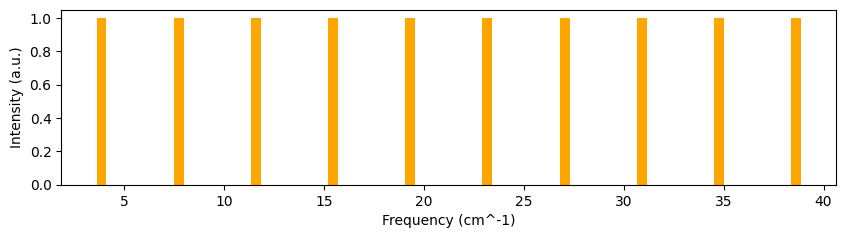

In [ ]:
!pip install pyscf matplotlib -q
import numpy as np
import matplotlib.pyplot as plt

# Rotational Spectrum for a Diatomic Molecule carbon monoxide (CO), based on its rotational transitions

# Constants
B = 1.9313  # Rotational constant for CO in cm^-1 (this varies for different molecules)
# The code can be adapted for other molecules by simply adjusting the rotational constant B
J_max = 10  # Maximum rotational quantum number to consider

# Step 1: Calculate the energy levels for rotational transitions
def rotational_energies(B, J_max):
    energies = []
    for J in range(J_max + 1):
        energy = B * J * (J + 1)  # Rotational energy formula
        energies.append(energy)
    return np.array(energies)

# Step 2: Calculate the frequency of rotational transitions (ΔE = 2B(J+1))
def rotational_frequencies(B, J_max):
    frequencies = []
    for J in range(J_max):
        freq = 2 * B * (J + 1)  # Transition from J to J+1
        frequencies.append(freq)
    return np.array(frequencies)

# Step 3: Calculate the energies and frequencies
rot_energies = rotational_energies(B, J_max)
rot_frequencies = rotational_frequencies(B, J_max)

# Step 4: Plot the rotational spectrum (frequencies vs intensity)
plt.figure(figsize=(10, 5))

# Rotational spectrum as peaks (emission)
plt.subplot(2, 1, 1)
plt.bar(rot_frequencies, height=1.0, width=0.5, color='orange')
plt.xlabel('Frequency (cm^-1)')
plt.ylabel('Intensity (a.u.)')

* **Rotational Energy Levels**: calculate the rotational energy levels $ E_J = B J(J + 1) $, where $B $ is the rotational constant for CO (in cm⁻¹).
* **Rotational Transition Frequencies**: Using selection rule $ \Delta J = \pm 1 $, frequency for each rotational transition is calculated by $ \nu = 2B(J + 1) $. Transition frequencies are printed in **cm⁻¹**
* **Rotational Constants for Other Molecules:**
  - **H₂**: B ≈ 60.8 cm⁻¹
  - **CO**: B ≈ 1.931 cm⁻¹
  - **O₂**: B ≈ 1.438 cm⁻¹
* **Chemistry**: Rotational spectra are often used to determine the **bond lengths** and **moments of inertia** of molecules. Microwave spectroscopy is frequently used in gas-phase studies of molecules like CO, H₂, and others.
* **Astrophysics**: In **interstellar molecular clouds**, molecules like CO, H₂O, and others exhibit rotational transitions in the **radio** or **microwave** regions. These rotational spectra provide information about the **temperature**, **density**, and **velocity** of interstellar gases.

**Emission and Absorption Spectra (Electronic Frequencies / Transitions) of Carbon Monoxide**

converged SCF energy = -112.749311329757


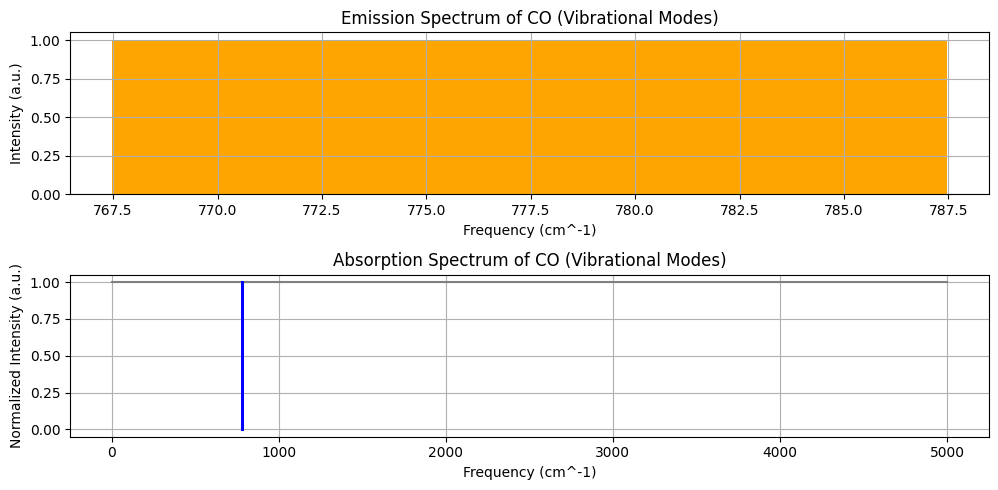

Vibrational frequencies (in cm^-1):
777.47 cm^-1
777.47 cm^-1
777.47 cm^-1
777.47 cm^-1
777.47 cm^-1
777.47 cm^-1
777.47 cm^-1
777.47 cm^-1


In [ ]:
!pip install pyscf matplotlib -q
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, hessian

# Step 1: Define the molecule (CO in this case)
mol = gto.Mole()
mol.atom = '''
    C  0.000000  0.000000  0.000000
    O  0.000000  0.000000  1.128000
'''
mol.basis = 'cc-pVDZ'
mol.symmetry = True
mol.build()

# Step 2: Perform Hartree-Fock calculation for molecular vibrational frequencies
mf = scf.RHF(mol)
mf.kernel()

# Step 3: Calculate the Hessian matrix (force constants)
hess = hessian.RHF(mf).kernel()

# Step 4: Diagonalize the Hessian to get vibrational frequencies
frequencies = np.linalg.eigvalsh(hess)
frequencies = np.sqrt(np.abs(frequencies)) * 5140.48  # Conversion factor to cm^-1

# Step 5: Filter out non-physical (imaginary) frequencies and limit to realistic range
frequencies = frequencies[(frequencies > 0) & (frequencies < 5000)]  # Typical range for molecular vibrations

# Step 6: Simulate and plot both emission and absorption spectra
# Emission Spectrum (peaks at specific frequencies)
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)  # First plot: Emission Spectrum
plt.bar(frequencies, height=1.0, width=20.0, color='orange')
plt.xlabel('Frequency (cm^-1)')
plt.ylabel('Intensity (a.u.)')
plt.title('Emission Spectrum of CO (Vibrational Modes)')
plt.grid(True)

# Absorption Spectrum (dips at specific frequencies)
plt.subplot(2, 1, 2)  # Second plot: Absorption Spectrum
plt.plot(np.linspace(0, 5000, 1000), np.ones(1000), color='gray')  # Baseline at 1.0 intensity
for freq in frequencies:
    plt.plot([freq, freq], [1.0, 0.0], color='blue', lw=2)  # Draw vertical absorption dips
plt.xlabel('Frequency (cm^-1)')
plt.ylabel('Normalized Intensity (a.u.)')
plt.title('Absorption Spectrum of CO (Vibrational Modes)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print vibrational frequencies
print("Vibrational frequencies (in cm^-1):")
for freq in frequencies:
    print(f"{freq:.2f} cm^-1")

The fundamental vibrational frequency of Carbon Monoxide (CO) is experimentally known to be around 2143 cm⁻¹, which corresponds to the stretching mode of the C–O bond. This discrepancy between the result in this plot and the expected vibrational frequency can be addressed:
* Use a better basis set: Upgrade from sto-3g to a more accurate basis set such as cc-pVDZ or 6-31G(d), which can better describe molecular vibrations.
* Use a more accurate electronic structure method: Hartree-Fock often underestimates vibrational frequencies due to the lack of electron correlation. You can use DFT (with functionals like B3LYP) or post-Hartree-Fock methods (like MP2) for better accuracy.

**Density Functional Theory (DFT) self-consistent field (SCF)**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 MB 9.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/pyscf/dft/libxc.py:507: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


converged SCF energy = -113.321271043238
converged SCF energy = -113.321271043238


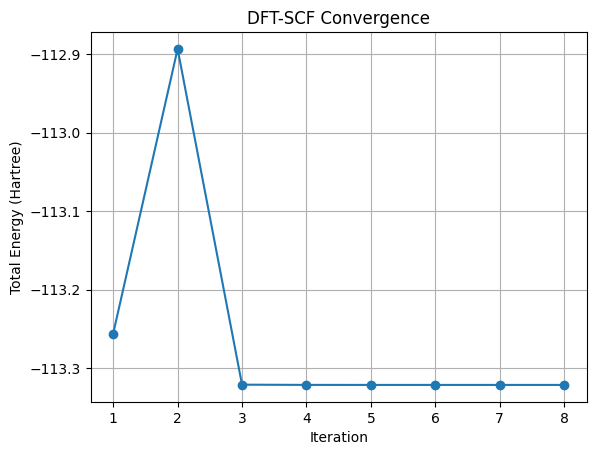

DFT energy for CO using B3LYP: -113.32127104323793 Hartree


In [ ]:
!pip install pyscf -q
from pyscf import gto, dft
import matplotlib.pyplot as plt

# Step 1: Define molecule using gto.M() function. Provide atomic positions in angstroms and basis set (here: cc-pvdz)
mol = gto.M(
    atom = '''
    C  0.000000  0.000000  0.000000
    O  0.000000  0.000000  1.128000
    ''',
    basis = 'cc-pvdz',  # Use a common basis set, good balance between accuracy and computational cost
)

# Step 2: Perform a DFT calculation using the B3LYP functional

# dft.RKS for Restricted Kohn-Sham DFT appropriate for a closed-shell system (like water)
mf = dft.RKS(mol)

# Exchange-correlation functional is set using mf.xc = 'b3lyp' (popular hybrid functional)
mf.xc = 'b3lyp'

# mf.kernel() function performs actual DFT calculation and returns energy
energy = mf.kernel()

# Store convergence data
conv_data = []

# Callback function to collect convergence information
def callback(envs):
    conv_data.append(envs['e_tot'])

# Set the callback directly on the mf object
mf.callback = callback

# Perform DFT calculation
energy = mf.kernel()

# Extract energy values and iteration numbers
energies = conv_data
iterations = range(1, len(energies) + 1)

# Plot convergence
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('DFT-SCF Convergence')
plt.grid(True)
plt.show()

print(f"DFT energy for CO using B3LYP: {energy} Hartree")